<a href="https://colab.research.google.com/github/hrmufid/Mini-Project-2/blob/main/Mini_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Investigate Hotel Business using Data Visualization**

# Import the necessary library

In [1]:
# import libraries
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# import shap
import warnings
warnings.filterwarnings('ignore')

In [2]:
# initialize random state
random_state = 42

# set plot style for whole notebook
sns.set_style('darkgrid')

# Load the dataset

In [3]:
# IMPORT DATA
data = pd.read_csv('https://raw.githubusercontent.com/hrmufid/Mini-Project-4/main/hotel_bookings_data.csv')

df = data.copy()
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


# Context

Anda berperan sebagai anggota dari tim Data Scientist di sebuah perusahaan hotel. Sebagai anggota dari tim Data Scientist, Anda mendapatkan tanggung jawab untuk memberikan insight-insight yang berhubungan dengan performa bisnis hotel. Insight tersebut dapat dicari dengan eksplorasi data, seperti menganalisis bagaimana perilaku para pelanggan dalam memesan tiket hotel ataupun mencari faktor-faktor yang mempengaruhi pembatalan pemesanan tiket hotel. Kemudian sajikan insight yang Anda dapatkan menggunakan visualisasi dan data story telling.

#1. Data Exploration

Sebelum memulai pemrosesan data, tahap paling awal yang harus dilakukan adalah mempersiapkan data mentah menjadi data yang bersih dan siap diolah. Kamu harus melakukan data preprocessing, yakni menangani berbagai permasalahan data seperti data yang kosong, data yang tidak sesuai, hingga mengidentifikasi data-data yang tidak dibutuhkan.

## 1.1 Descriptive Statistics Analysis

Beberapa yang perlu dicek :
1. ukuran data.</br> df.shape
2. tipe data & struktur variabel.</br> df.info()
3. missing value.</br> df.isnull().sum()
4. duplicate data.</br> df.duplicated().sum()
5. statistik ringkasan numerik. Cek distribusi dan potensi outlier.</br> df.describe()
6. Distribusi variabel numerik.</br> Histogram / KDE plot → lihat pola distribusi (normal, skewed, heavy-tail).</br> Boxplot → deteksi outlier.
7. distribusi variabel kategorik. </br>
8. outliers detection.</br> Dengan boxplot / IQR method / Z-score.
9. Korelasi antar Variabel Numerik.</br> Korelasi Pearson / Spearman untuk melihat hubungan antar fitur.</br> (heatmap untuk visualisasi).
10. Tren & Pola Waktu (kalau ada kolom tanggal).</br> Jumlah reservasi per bulan/tahun.</br> Musiman: puncak booking pada liburan?
11. class imbalance.

### ukuran data

In [4]:
# ukuran data
df.shape

(119390, 29)

### tipe data dan struktur variabel

In [5]:
# tipe data dan struktur variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Dapat dilihat di dalam dataset terdapat 29 kolom dan 119390 baris (paling banyak) dan terdapat nilai null.
</br>
Kolom `reservation_status` menjadi kolom target

**Keterangan kolom**

1. hotel → jenis hotel tempat reservasi dilakukan (Resort Hotel atau City Hotel).
2. is_canceled → status apakah booking dibatalkan (1 = dibatalkan, 0 = tidak).
3. lead_time → jumlah hari antara tanggal pemesanan dan tanggal kedatangan.
4. arrival_date_year → tahun kedatangan tamu.
5. arrival_date_month → bulan kedatangan tamu (dalam teks, contoh: "July").
6. arrival_date_week_number → nomor minggu dalam setahun saat tamu tiba.
7. arrival_date_day_of_month → tanggal kedatangan tamu dalam bulan.
8. stays_in_weekend_nights → jumlah malam akhir pekan (Sabtu–Minggu) yang dipesan/dihabiskan tamu.
9. stays_in_weekdays_nights → jumlah malam hari kerja (Senin–Jumat) yang dipesan/dihabiskan tamu.
10. adults → jumlah orang dewasa dalam pemesanan.
11. children → jumlah anak-anak dalam pemesanan.
12. babies → jumlah bayi dalam pemesanan.
13. meal → jenis paket makanan yang dipesan (BB = Bed & Breakfast, HB = Half board, FB = Full board, SC = No meal).
14. city → asal kota dari customer (sering disebut country di dataset asli, misalnya "PRT" untuk Portugal).
15. market_segment → segmen pasar customer (Direct, Corporate, Online TA, Offline TA/TO, dll.).
16. distribution_channel → saluran distribusi pemesanan (Direct, TA/TO, GDS, dll.).
17. is_repeated_guest → apakah tamu pernah menginap sebelumnya (1 = ya, 0 = tidak).
18. previous_cancellations → jumlah pemesanan sebelumnya oleh customer yang dibatalkan.
19. previous_bookings_not_canceled → jumlah pemesanan sebelumnya oleh customer yang tidak dibatalkan.
20. booking_changes → jumlah perubahan/amandemen yang dilakukan pada pemesanan ini.
21. deposit_type → tipe deposit yang diminta (No Deposit, Non Refund, Refundable).
22. agent → ID agen perjalanan yang membuat pemesanan (jika ada).
23. company → ID perusahaan yang memesan (jika ada, biasanya untuk group booking).
24. days_in_waiting_list → jumlah hari pemesanan berada di waiting list sebelum dikonfirmasi.
25. customer_type → jenis customer (Transient, Contract, Transient-Party, Group).
26. adr (Average Daily Rate) → rata-rata harga per kamar yang dibayar, dihitung sebagai total transaksi dibagi jumlah malam menginap.
27. required_car_parking_spaces → jumlah ruang parkir mobil yang diminta tamu.
28. total_of_special_requests → jumlah permintaan khusus dari tamu (contoh: kamar connecting, tempat tidur tambahan).
29. reservation_status → status akhir reservasi (Canceled, Check-Out, No-Show).


In [16]:
# Buat dulu kategori kolom numerical & categorical
cats = df.select_dtypes(include='object').columns.tolist()
nums = df.select_dtypes(include='number').columns.tolist()

In [17]:
print('kolom categorical :', cats)
print('kolom numerical :', nums)

kolom categorical : ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']
kolom numerical : ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [18]:
df[nums].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Kemungkian terdapat outlier dilihat dari Q1, Q3 dan min max dari setiap kolom.


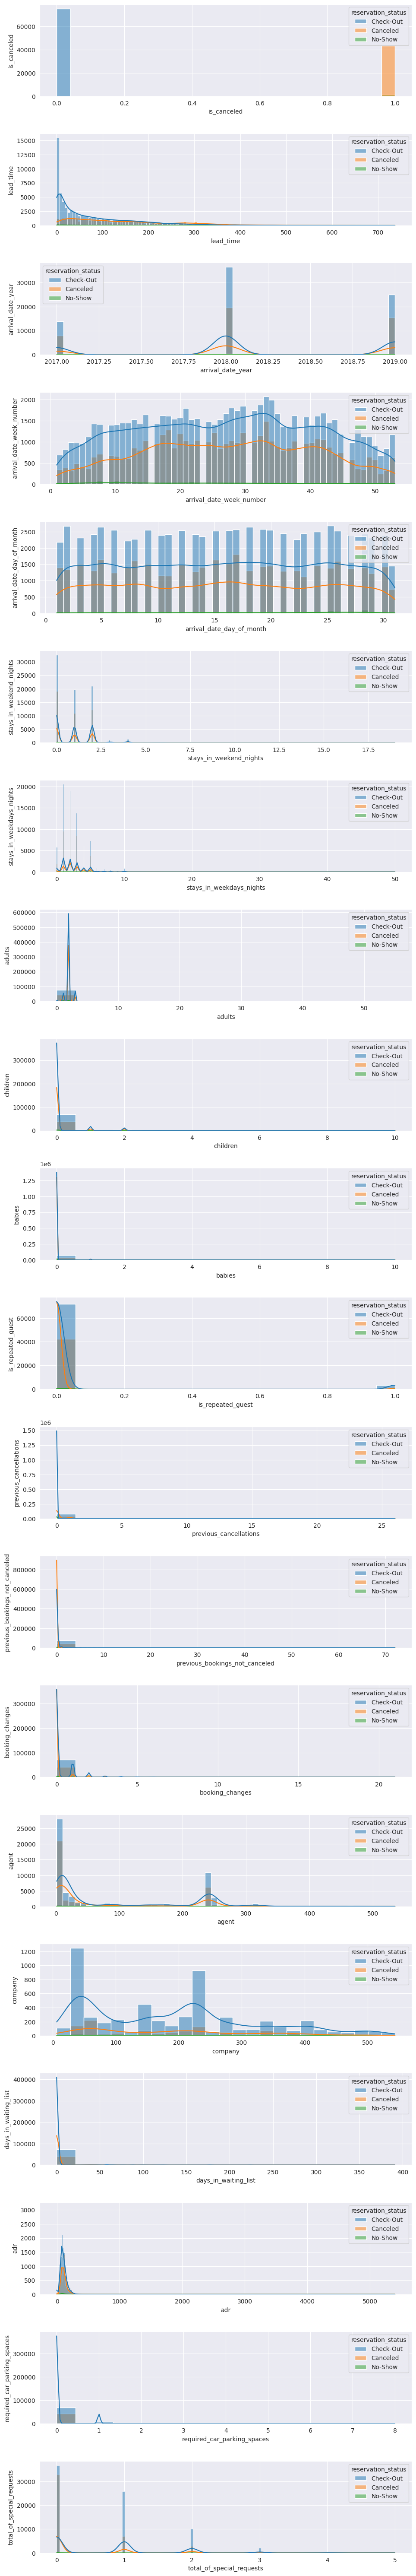

In [31]:
# sebaran data numeric
fig, axs = plt.subplots(len(nums), figsize=(10, len(nums)*3)) # Increased figsize height

for i, col in enumerate(nums):
  sns.histplot(data=df, x=col, hue='reservation_status', kde=True, ax=axs[i]) # Plot each column on its own subplot
  axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [19]:
df[cats].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


### missing value

In [6]:
# missing value
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_weekdays_nights,0
adults,0


**Terdapat nilai null di kolom `children`, `city`, `agent`, dan `company`, sehingga perlu dilakukan penanganan**

In [7]:
df_children = pd.DataFrame({'children': df['children'].value_counts().index,
                            'count': df['children'].value_counts().values,
                            'percentage': (df['children'].value_counts().values *100/len(df)).round(2)})
df_children

,children,count,percentage
0,0.0,110796,92.80
1,1.0,4861,4.07
2,2.0,3652,3.06
3,3.0,76,0.06
4,10.0,1,0.00


In [8]:
df['children'].describe()

,children
count,119386.000000
mean,0.103890
std,0.398561
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,10.000000


missing value di kolom children dapat diisi dengan modus, tidak dengan menggunakan mean

In [9]:
# Handle missing value (null)
# kita buat tabel dulu untuk liat seberapa besar %-tase missing value (city, agent, company)
missing_data = df[['children','city', 'agent', 'company']].isnull().sum() * 100 / len(df)
missing_mode = df[['children','city', 'agent', 'company']].mode().iloc[0]

# Calculate mean and median only for relevant numerical columns
missing_mean = df[['children', 'agent', 'company']].mean().round(2)
missing_median = df[['children', 'agent', 'company']].median().round(2)

missing_df = pd.DataFrame({
    'col_name': missing_data.index,
    'percent_missing': missing_data.values,
    'mode': missing_mode.values
})

# Add the mean & median for agent and company separately, including np.nan for other columns
missing_df['mean'] = [missing_mean['children'], np.nan, missing_mean['agent'], missing_mean['company']]
missing_df['median'] = [missing_median['children'], np.nan, missing_median['agent'], missing_median['company']]


missing_df

,col_name,percent_missing,mode,mean,median
0,children,0.003350,0.0,0.10,0.0
1,city,0.408744,Kota Denpasar,NaN,NaN
2,agent,13.686238,9.0,86.69,14.0
3,company,94.306893,40.0,189.27,179.0


Kolom `city` bisa saja dihilangkan karena kurang dari 5%. namun kita juga bisa impute dengan mode (karena categorical column).<br>
Kolom agent dan company

**KOLOM AGENT**

In [10]:
# KOLOM AGENT
df_agent = pd.DataFrame({'unique_value': df['agent'].value_counts().index,
                         'count': df['agent'].value_counts().values,
                         'percentage': (df['agent'].value_counts().values *100/len(df)).round(2)})
df_agent

,unique_value,count,percentage
0,9.0,31961,26.77
1,240.0,13922,11.66
2,1.0,7191,6.02
3,14.0,3640,3.05
4,7.0,3539,2.96
...,...,...,...
328,197.0,1,0.00
329,294.0,1,0.00
330,388.0,1,0.00
331,453.0,1,0.00


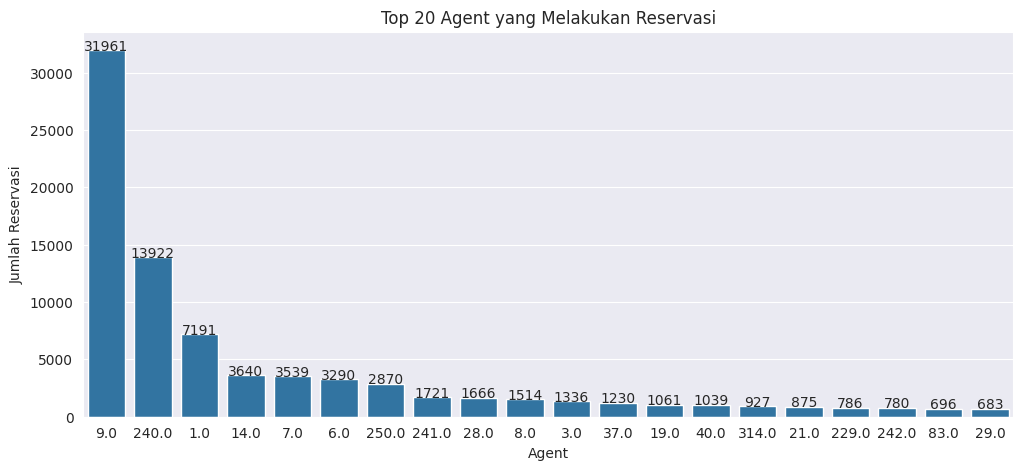

In [11]:
# kita buat grafik sebaran dari df_agent
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='unique_value',
              y='count',
              data=df_agent.sort_values('count', ascending=False).head(20),
              order=df_agent.sort_values('count', ascending=False).head(20).unique_value)
plt.title('Top 20 Agent yang Melakukan Reservasi')
plt.xlabel('Agent')
plt.ylabel('Jumlah Reservasi')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,   # posisi x (tengah bar)
            p.get_height() + 5,            # posisi y (sedikit di atas bar)
            int(p.get_height()),           # isi text (angka count)
            ha='center')                   # rata tengah

plt.show()

**Dari kolom `agent` dapat dilihat harusnya merupakan kolom dengan data object, namun dalam dataset diidentifikasi sebagai tipe data integer (int64).** <br>
Untuk handle missing value di kolom `agent` dapat menggunakan **modus** dari data

In [12]:
# cek apakah ada data customer yang duplicate
df_duplicate = pd.DataFrame({'jumlah_duplicate': df.duplicated(keep='first').sum(),
                             'persentase_duplicate': df.duplicated(keep='first').sum() * 100 / len(df)},
                            index=['duplicate'])
df_duplicate

,jumlah_duplicate,persentase_duplicate
duplicate,33261,27.859117


Terdapat sebanyak 33261 baris yg duplicate (27,9% dari seluruh data). Perlu dilakukan drop duplicate data. Tapi perlu dicek dulu, ini datanya full duplicate atau cuma sebagian aja.

In [13]:
# cek data duplicate
df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
78101,City Hotel,0,0,2017,December,40,2,0,2,1,...,2,No Deposit,NaN,NaN,0,Family,145.0,0,0,Check-Out
78104,City Hotel,0,0,2017,December,40,2,0,2,1,...,2,No Deposit,NaN,NaN,0,Family,145.0,0,0,Check-Out
78105,City Hotel,0,0,2017,December,40,2,0,2,1,...,2,No Deposit,NaN,NaN,0,Family,145.0,0,0,Check-Out
78403,City Hotel,0,0,2017,December,41,6,0,3,1,...,0,No Deposit,NaN,NaN,0,Personal,130.0,0,0,Check-Out
78407,City Hotel,0,0,2017,December,41,6,0,3,1,...,0,No Deposit,NaN,NaN,0,Personal,130.0,0,0,Check-Out
78385,City Hotel,0,0,2017,December,41,7,0,2,1,...,0,No Deposit,1.0,NaN,0,Family,119.0,0,0,Check-Out
78401,City Hotel,0,0,2017,December,41,7,0,2,1,...,0,No Deposit,1.0,NaN,0,Family,119.0,0,0,Check-Out
78404,City Hotel,0,0,2017,December,41,7,0,2,1,...,0,No Deposit,1.0,NaN,0,Family,119.0,0,0,Check-Out
78402,City Hotel,0,0,2017,December,41,7,0,2,2,...,0,No Deposit,1.0,NaN,0,Family,138.0,0,0,Check-Out
78405,City Hotel,0,0,2017,December,41,7,0,2,2,...,0,No Deposit,1.0,NaN,0,Family,138.0,0,0,Check-Out


In [14]:
# --- 1. Cek jumlah duplikat identik (semua kolom sama persis) ---
full_duplicates = df.duplicated(keep=False)
print("Jumlah duplikat identik (semua kolom sama):", full_duplicates.sum())

# --- 2. Tampilkan contoh 10 baris duplikat identik ---
df[full_duplicates].head(10)

Jumlah duplikat identik (semua kolom sama): 41513


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
21,Resort Hotel,0,72,2017,September,27,1,2,4,2,...,1,No Deposit,250.0,NaN,0,Personal,84.67,0,1,Check-Out
22,Resort Hotel,0,72,2017,September,27,1,2,4,2,...,1,No Deposit,250.0,NaN,0,Personal,84.67,0,1,Check-Out
39,Resort Hotel,0,70,2017,September,27,2,2,3,2,...,0,No Deposit,250.0,NaN,0,Personal,137.00,0,1,Check-Out
43,Resort Hotel,0,70,2017,September,27,2,2,3,2,...,0,No Deposit,250.0,NaN,0,Personal,137.00,0,1,Check-Out
132,Resort Hotel,1,5,2017,September,28,5,1,0,2,...,0,No Deposit,240.0,NaN,0,Personal,97.00,0,0,Canceled
138,Resort Hotel,1,5,2017,September,28,5,1,0,2,...,0,No Deposit,240.0,NaN,0,Personal,97.00,0,0,Canceled
198,Resort Hotel,0,0,2017,September,28,7,0,1,1,...,0,No Deposit,240.0,NaN,0,Personal,109.80,0,3,Check-Out
200,Resort Hotel,0,0,2017,September,28,7,0,1,1,...,0,No Deposit,240.0,NaN,0,Personal,109.80,0,3,Check-Out


In [15]:
# --- 3. Cek duplikat berdasarkan subset kolom utama ---
# (misalnya kolom yang mendefinisikan reservasi unik)
subset_cols = ['hotel', 'arrival_date_year',
    'arrival_date_month', 'arrival_date_day_of_month',
    'stays_in_weekend_nights', 'stays_in_weekdays_nights',
    'adults', 'children','babies', 'customer_type','adr','lead_time','city'
    # ,'reservation_status'
    ]

subset_duplicates = df.duplicated(subset=subset_cols, keep=False)
print("Jumlah duplikat pada subset kolom:", subset_duplicates.sum(), (subset_duplicates.sum() * 100 / len(df)).round(2), '%')

# --- 4. Lihat contoh duplikat subset (untuk analisis lebih lanjut) ---
df[subset_duplicates].sort_values(by=subset_cols).head(20)

Jumlah duplikat pada subset kolom: 45749 38.32 %


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
78050,City Hotel,0,3,2017,December,40,1,0,1,1,...,0,No Deposit,NaN,45.0,0,Personal,0.00,0,0,Check-Out
78051,City Hotel,0,3,2017,December,40,1,0,1,1,...,0,No Deposit,NaN,45.0,0,Personal,0.00,0,0,Check-Out
78041,City Hotel,0,9,2017,December,40,1,0,1,1,...,0,No Deposit,NaN,40.0,0,Personal,65.00,0,0,Check-Out
78042,City Hotel,0,9,2017,December,40,1,0,1,1,...,0,No Deposit,NaN,40.0,0,Personal,65.00,0,0,Check-Out
78055,City Hotel,0,1,2017,December,40,1,0,1,1,...,0,No Deposit,83.0,NaN,0,Personal,96.00,0,0,Check-Out
78059,City Hotel,0,1,2017,December,40,1,0,1,1,...,0,No Deposit,83.0,NaN,0,Personal,96.00,0,0,Check-Out
78092,City Hotel,0,17,2017,December,40,1,0,2,1,...,1,No Deposit,7.0,NaN,0,Personal,73.88,0,3,Check-Out
78093,City Hotel,0,17,2017,December,40,1,0,2,1,...,0,No Deposit,7.0,NaN,0,Personal,73.88,0,3,Check-Out
74154,City Hotel,1,349,2017,December,40,1,0,2,2,...,0,Non Refund,1.0,NaN,0,Contract,62.00,0,0,Canceled
74155,City Hotel,1,349,2017,December,40,1,0,2,2,...,0,Non Refund,1.0,NaN,0,Contract,62.00,0,0,Canceled


Duplicate data perlu di-handle drop

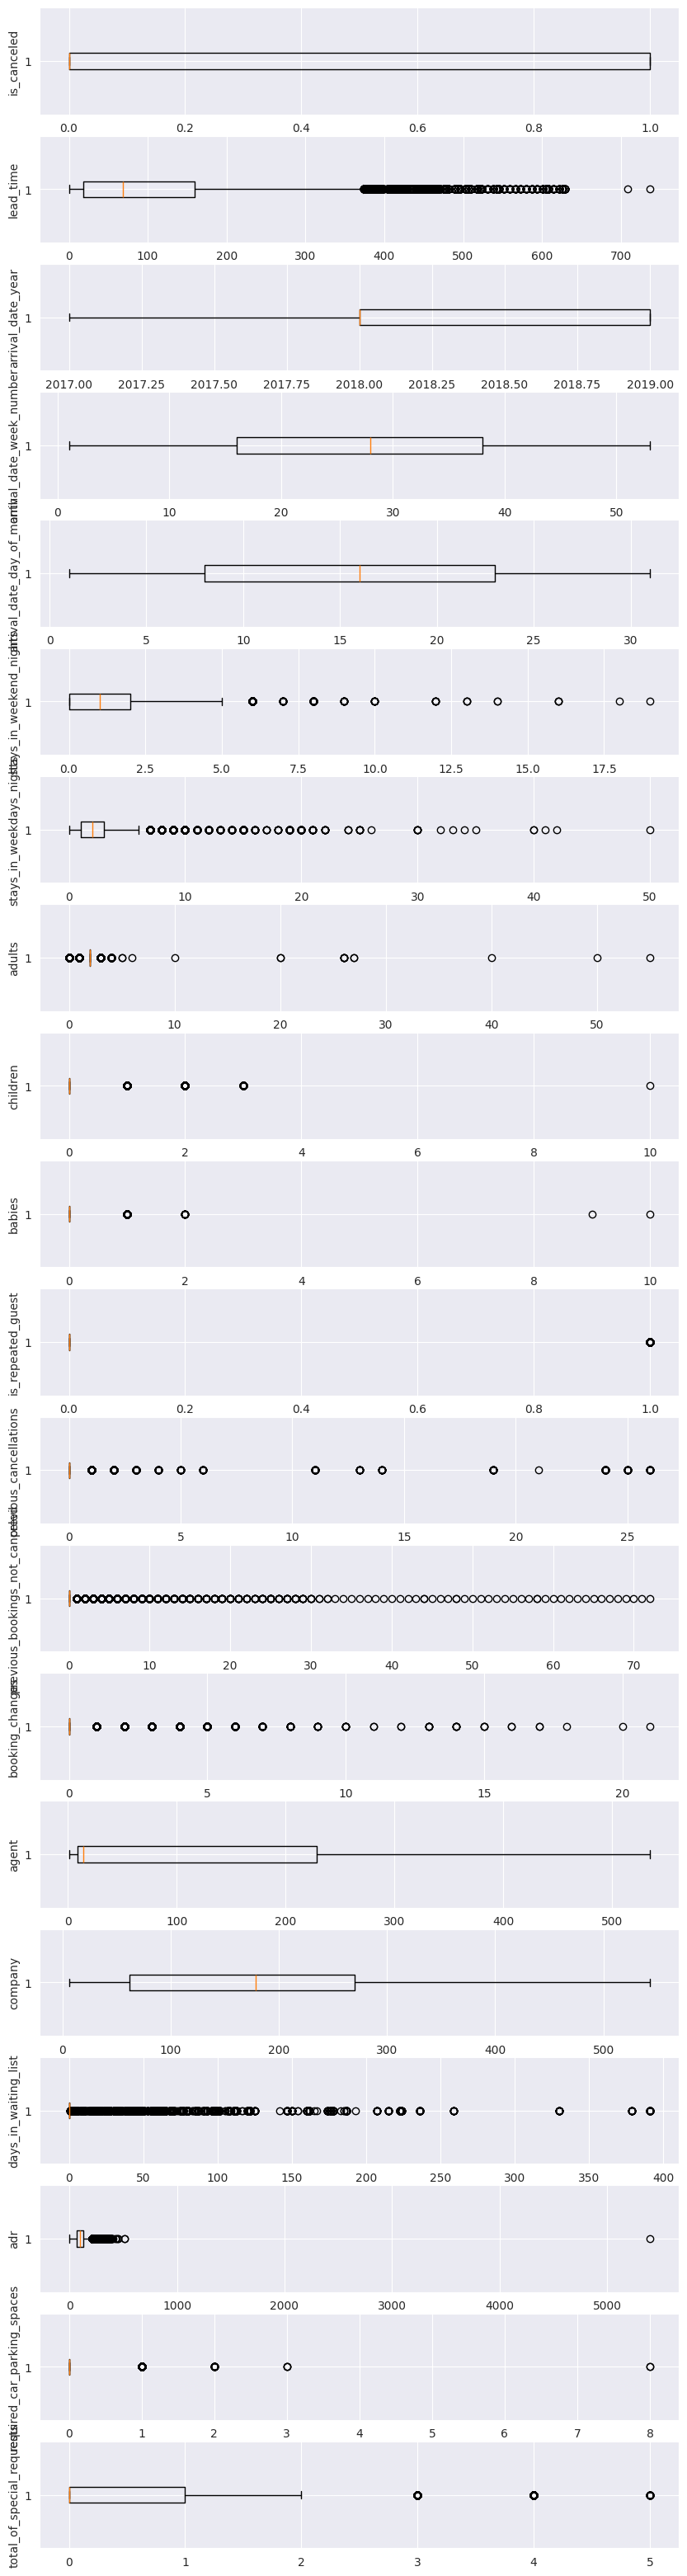

In [20]:
# Cek outliers
fig, axs = plt.subplots(len(nums), figsize=(10, len(nums)*2))

for i, col in enumerate(nums):
  axs[i].boxplot(df[col].dropna(), vert=False)
  axs[i].set_ylabel(col)

# plt.tight_layout()

plt.show()

## 1.2 Univariate Analysis

### 1.2.1 Pemeriksaan Rasio Data Target

In [21]:
df_reservation_status = pd.DataFrame({'reservation_status': df['reservation_status'].value_counts().index,
                                      'counts': df['reservation_status'].value_counts().values,
                                      'percentage': (df['reservation_status'].value_counts().values *100/len(df)).round(3)
                                      })
df_reservation_status

,reservation_status,counts,percentage
0,Check-Out,75166,62.958
1,Canceled,43017,36.031
2,No-Show,1207,1.011


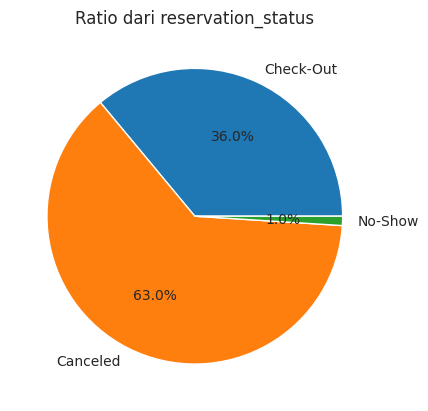

In [22]:
# Cek ratio dari revervation_status
# plt.figure(figsize=(6,6))
df.groupby('reservation_status').size().plot(kind='pie', labels=df['reservation_status'].unique(), autopct='%1.1f%%')
plt.title('Ratio dari reservation_status')
plt.show()

No-show berarti sudah melakukan pemesanan (booking) namun tidak datang pada tanggal reservasi. Bisa dikategorikan menjadi 'canceled' atau pun bisa kita drop karena nilai yang terlalu sedikit.

### 1.2.2 Pemeriksaan Sebaran Data untuk Tiap Fitur/Variabel